In [9]:
%run utils.ipynb

In [2]:
# def k_means_analysis(data, labels):
#     elbow_curve(data, n_clusters_range=list(range(1, 10)))
#     n_clusters_range = [2,3,4,5,6,7,8,9,10]
#     k_means_performance_curve(n_clusters_range, data, labels)
#     silhouette_plot(n_clusters_range, data, labels=labels)

In [2]:
estimator = KMeans(init='k-means++', n_clusters=2, max_iter = 300, n_init = 10, random_state = 0)
_bench = bench_k_means(estimator, name="k-means++", data=wdata['X_train'], labels=wdata['y_train'], sample_size=wdata['X_train'].shape[0])

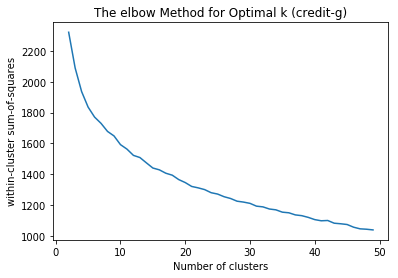

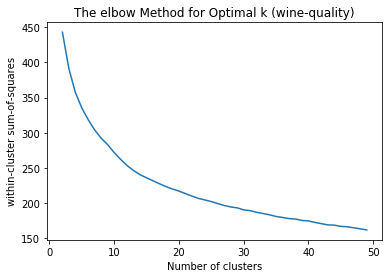

In [39]:
def elbow_curve(data):
    n_clusters_range = list(range(2, 50))
    df = performance_k_means(data['X'], 
                                  data['y'], 
                                  data['name'], 
                                  n_clusters_range=n_clusters_range)

    #Plotting the results onto a line graph, allowing us to observe 'The elbow'
    plt.plot(df['n_clusters'], df['inertia'])
    plt.title('The elbow Method for Optimal k (%s)'%data['name'])
    plt.xlabel('Number of clusters')
    plt.ylabel('within-cluster sum-of-squares') #within cluster sum of squares
    plt.show()

elbow_curve(cdata)
elbow_curve(wdata)

K Means, AMI 18 0.019499275616028593
EM, AMI 17 0.015476724200594675
K Means, silhouette 0 0.1553102389902605
EM, silhouette 1 0.13653027141027116


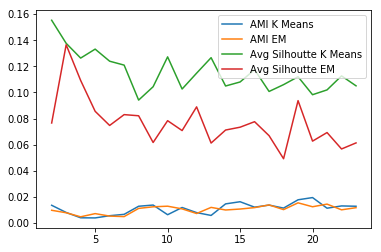

For n_clusters = 2 The average silhouette_score is : 0.15613736174711157
For n_clusters = 3 The average silhouette_score is : 0.1571375550053635
For n_clusters = 4 The average silhouette_score is : 0.13658723721634478
For n_clusters = 5 The average silhouette_score is : 0.13514370735025938
For n_clusters = 6 The average silhouette_score is : 0.12460914148332801
For n_clusters = 7 The average silhouette_score is : 0.13487110726066473
For n_clusters = 8 The average silhouette_score is : 0.13033124566558574
For n_clusters = 9 The average silhouette_score is : 0.10937586767457481
For n_clusters = 10 The average silhouette_score is : 0.11338433726172585


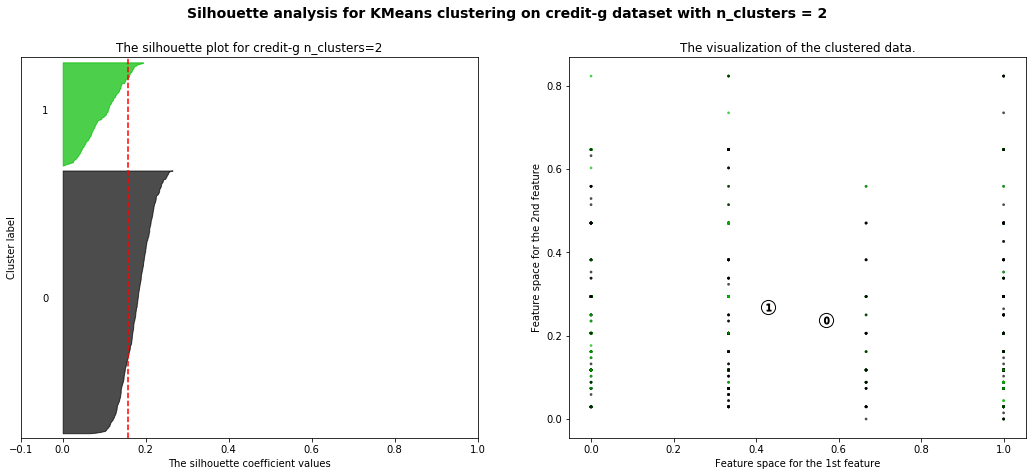

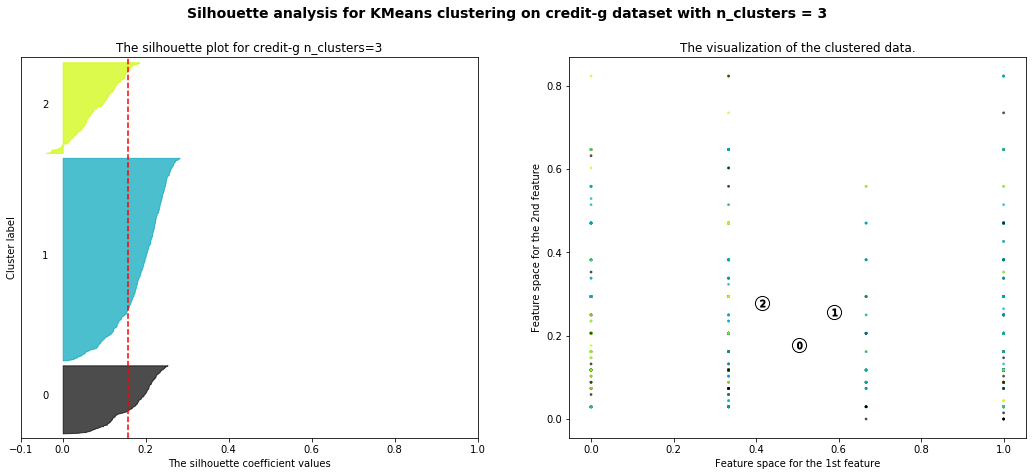

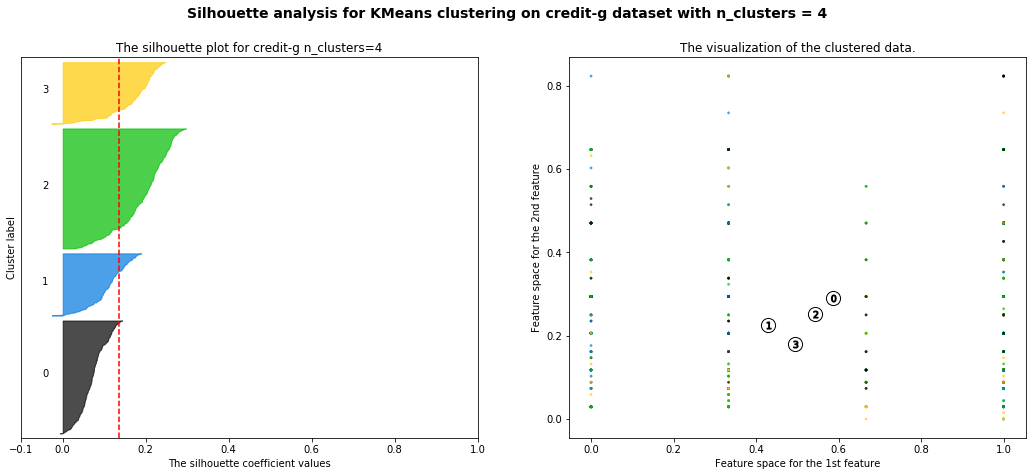

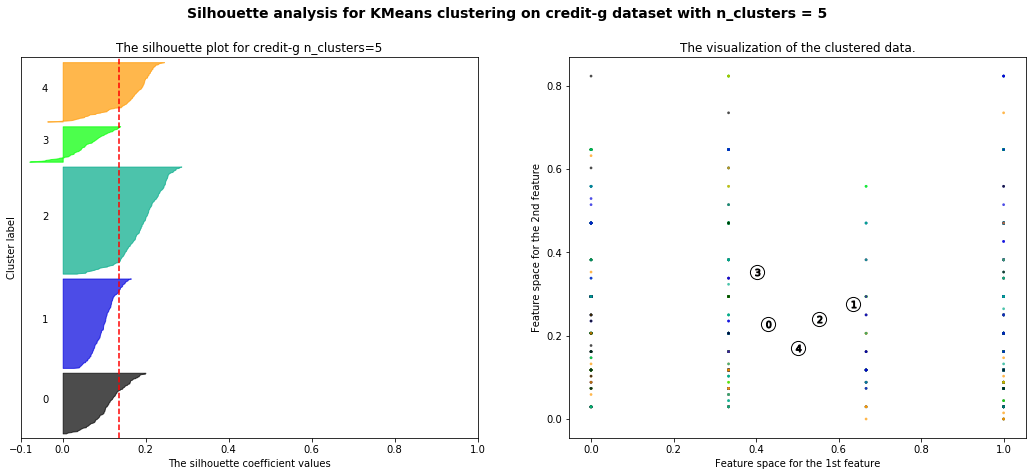

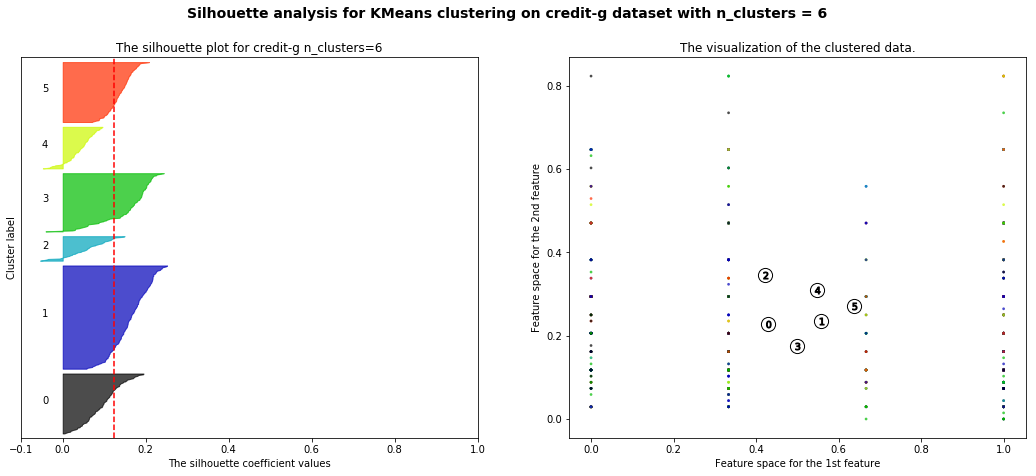

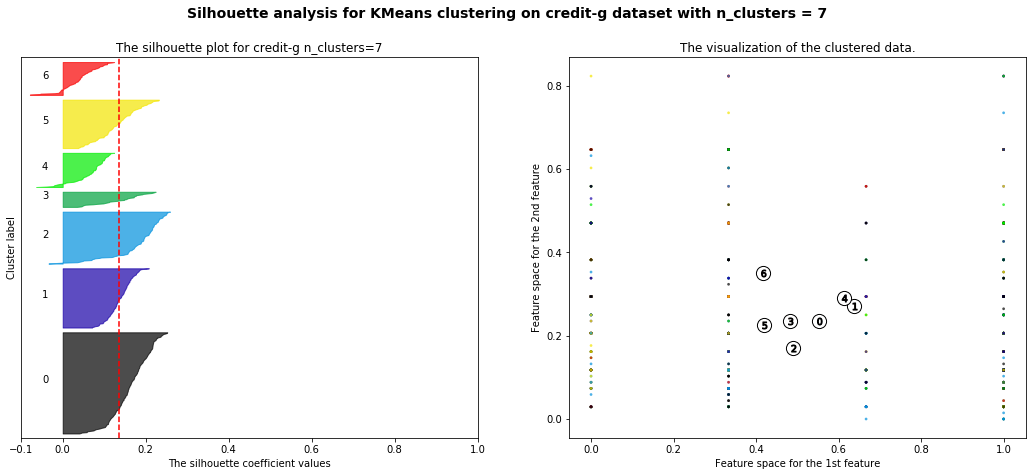

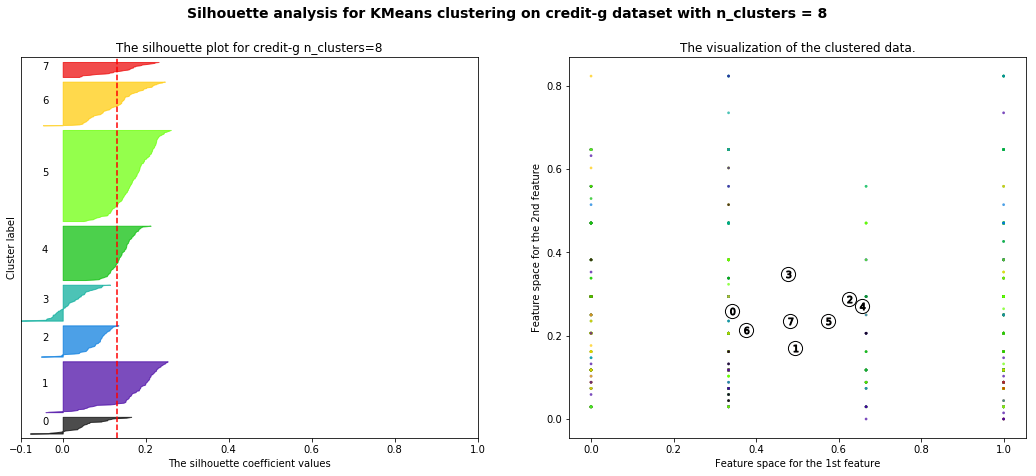

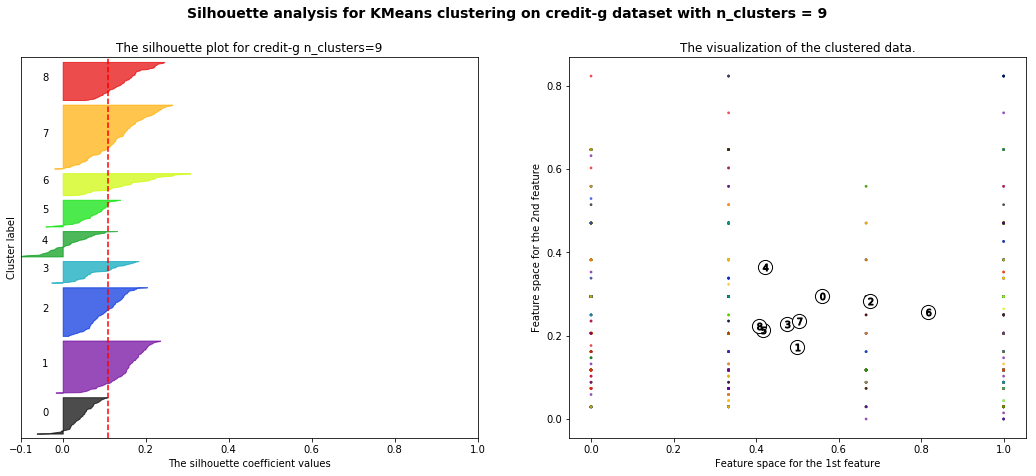

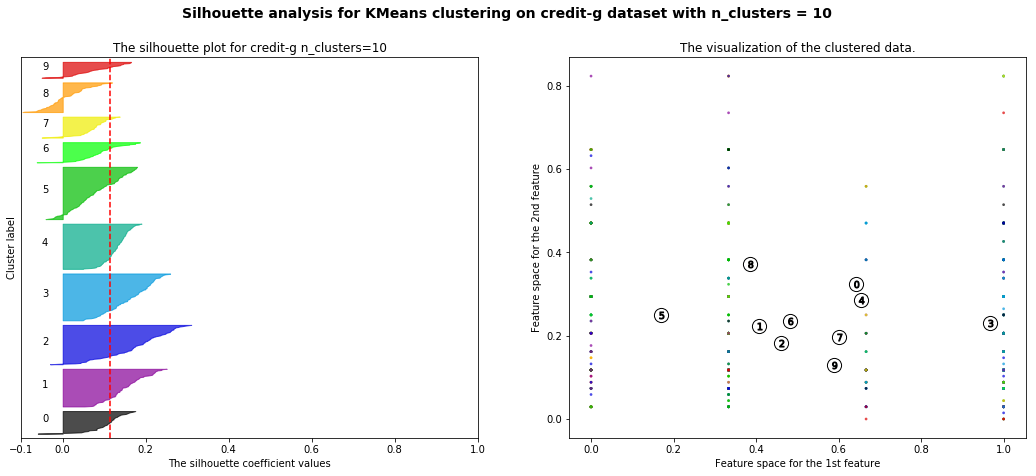

In [40]:

n_clusters_range = [2,3,4,5,6,7,8,9,10]
silhouette_plot(cdata['name'],n_clusters_range, cdata['X_train'])


In [ ]:
n_clusters_range = [2,3,4,5,6,7,8,9,10,12,14]
silhouette_plot(wdata['name'],n_clusters_range, wdata['X_train'])

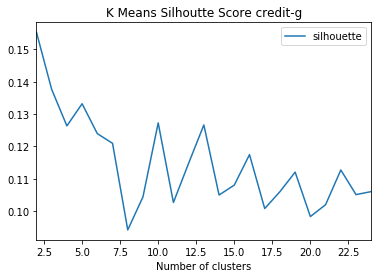

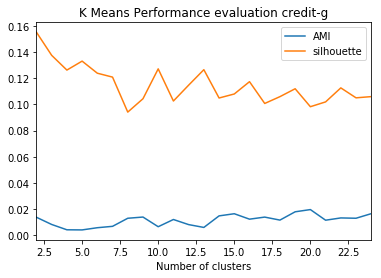

In [13]:
n_clusters_range = list(range(2,cdata['n_features']+1,1))
k_means_performance_curve(cdata['name'], n_clusters_range, cdata['X'], cdata['y'])

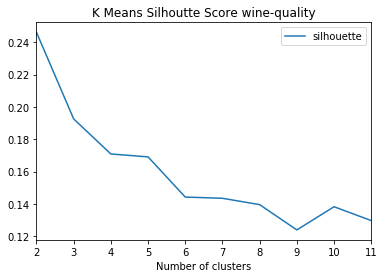

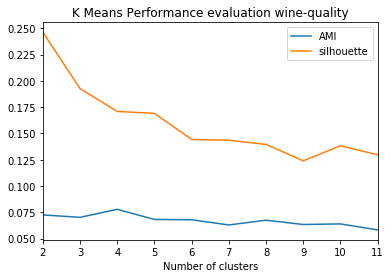

In [11]:

n_clusters_range = list(range(2,wdata['n_features']+1,1))
k_means_performance_curve(wdata['name'], n_clusters_range, wdata['X'], wdata['y'])

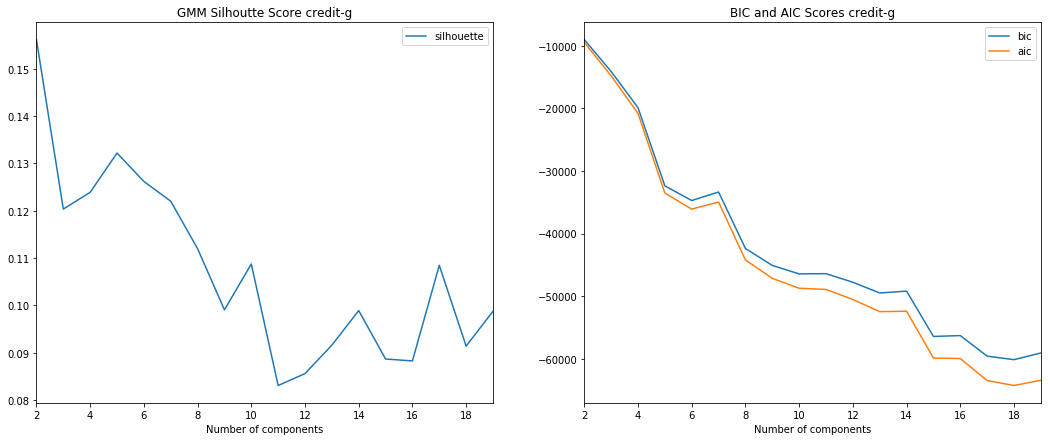

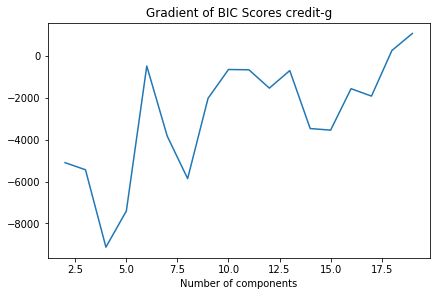

In [36]:
n_components_range = list(range(2,20,1))
em_performance_curve(cdata['name'], n_components_range, cdata['X_train'], cdata['y_train'], cov_type='diag')

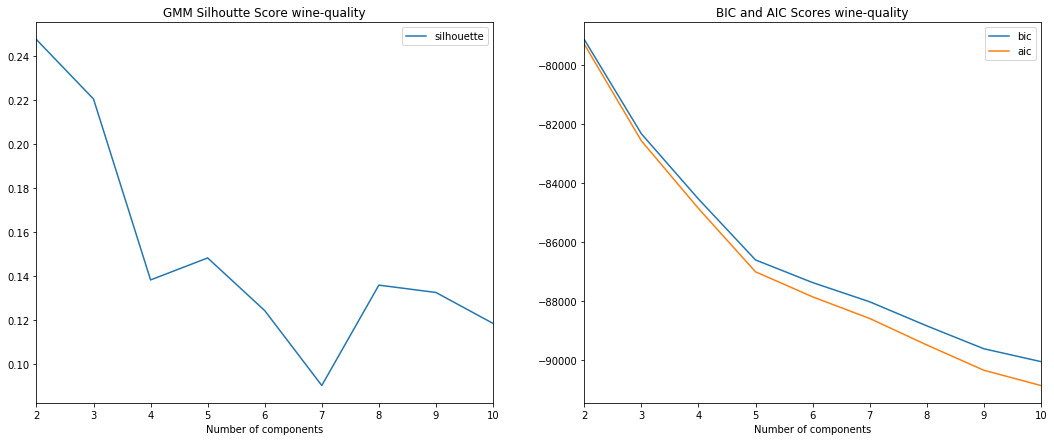

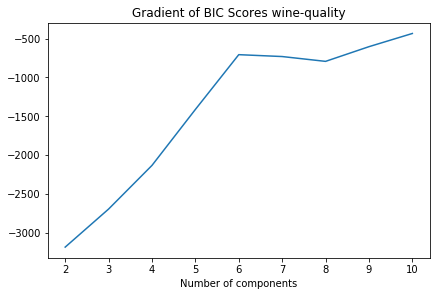

In [35]:
n_components_range = list(range(2,20,1))
em_performance_curve(wdata['name'], n_components_range, wdata['X_train'], wdata['y_train'], cov_type='spherical')

K Means, AMI 2 0.0778079735395417
EM, AMI 0 0.07265179844263986
K Means, silhouette 0 0.24619145662388364
EM, silhouette 0 0.24665231552579472


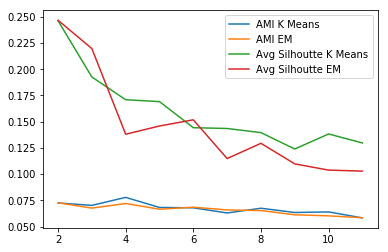

In [37]:
data = wdata
np.random.seed(10)
n_clusters_range = list(range(2, data['n_features']+1))
dfk = performance_k_means(data['X'], 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfk.to_csv(f"./results/km_{data['name']}.csv", index=False )

dfe = performance_em(data['X'], 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfe.to_csv(f"./results/em_{data['name']}.csv", index=False )


plt.plot(dfk['n_clusters'],dfk['AMI'], label="AMI K Means")
plt.plot(dfe['n_clusters'],dfe['AMI'], label="AMI EM")
plt.plot(dfk['n_clusters'],dfk['silhouette'], label="Avg Silhoutte K Means")
plt.plot(dfe['n_clusters'],dfe['silhouette'], label="Avg Silhoutte EM")

print("K Means, AMI", np.argmax(dfk['AMI']),np.max(dfk['AMI']))
print("EM, AMI", np.argmax(dfe['AMI']),np.max(dfe['AMI']))
print("K Means, silhouette", np.argmax(dfk['silhouette']),np.max(dfk['silhouette']))
print("EM, silhouette", np.argmax(dfe['silhouette']),np.max(dfe['silhouette']))

plt.legend()
plt.show()


K Means, AMI 18 0.019499275616028593
EM, AMI 17 0.015476724200594675
K Means, silhouette 0 0.1553102389902605
EM, silhouette 1 0.13653027141027116


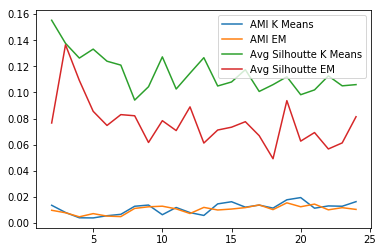

In [38]:
data = cdata
np.random.seed(10)
n_clusters_range = list(range(2, data['n_features']+1))
dfk = performance_k_means(data['X'], 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfk.to_csv(f"./results/km_{data['name']}.csv", index=False )

dfe = performance_em(data['X'], 
                              data['y'], 
                              data['name'], 
                              n_clusters_range=n_clusters_range)
dfe.to_csv(f"./results/em_{data['name']}.csv", index=False )




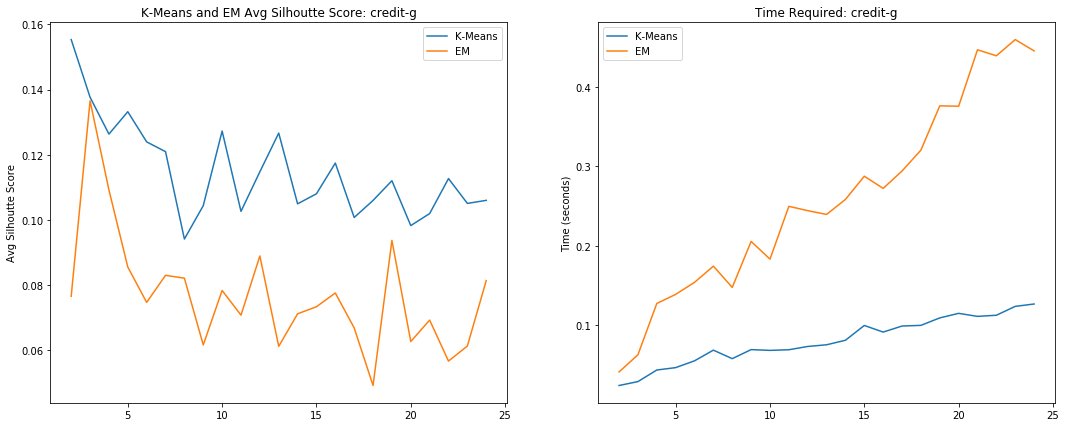

In [53]:
data = cdata

dfk = pd.read_csv(f"./results/km_{data['name']}.csv")
dfe = pd.read_csv(f"./results/em_{data['name']}.csv")
                  
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18, 7)                  
ax1.plot(dfk['n_clusters'],dfk['silhouette'], label="K-Means")
ax1.plot(dfe['n_clusters'],dfe['silhouette'], label="EM")
ax1.set_ylabel("Avg Silhoutte Score")
ax1.set_title("K-Means and EM Avg Silhoutte Score: %s"%data['name'])
ax1.legend()

ax2.plot(dfk['n_clusters'],dfk['time'], label="K-Means")
ax2.plot(dfe['n_clusters'],dfe['time'], label="EM")
ax2.set_ylabel("Time (seconds)")
ax2.set_title("Time Required: %s"%data['name'])
ax2.legend()
plt.show()


# plt.show()
                  
# plt.plot(dfk['n_clusters'],dfk['AMI'], label="AMI K Means")
# plt.plot(dfe['n_clusters'],dfe['AMI'], label="AMI EM")
# plt.plot(dfk['n_clusters'],dfk['silhouette'], label="Avg Silhoutte K Means")
# plt.plot(dfe['n_clusters'],dfe['silhouette'], label="Avg Silhoutte EM")

# print("K Means, AMI", np.argmax(dfk['AMI']),np.max(dfk['AMI']))
# print("EM, AMI", np.argmax(dfe['AMI']),np.max(dfe['AMI']))
# print("K Means, silhouette", np.argmax(dfk['silhouette']),np.max(dfk['silhouette']))
# print("EM, silhouette", np.argmax(dfe['silhouette']),np.max(dfe['silhouette']))

# plt.legend()
# plt.show()

K Means, AMI 18 0.019499275616028596
EM, AMI 17 0.015476724200594675


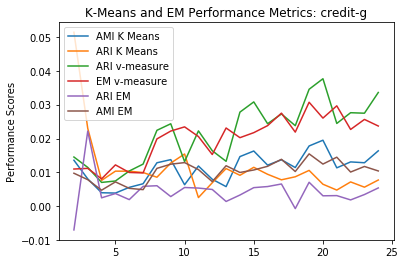

In [66]:
data = cdata

dfk = pd.read_csv(f"./results/km_{data['name']}.csv")
dfe = pd.read_csv(f"./results/em_{data['name']}.csv")
                  
fig, ax1 = plt.subplots()
                  
ax1.plot(dfk['n_clusters'],dfk['AMI'], label="AMI K Means")
ax1.plot(dfk['n_clusters'],dfk['ARI'], label="ARI K Means")
ax1.plot(dfk['n_clusters'],dfk['v-measure'], label="ARI v-measure")
ax1.plot(dfe['n_clusters'],dfe['v-measure'], label="EM v-measure")
ax1.plot(dfe['n_clusters'],dfe['ARI'], label="ARI EM")
ax1.plot(dfe['n_clusters'],dfe['AMI'], label="AMI EM")
                  
ax1.set_title("K-Means and EM Performance Metrics: %s"%data['name'])
ax1.set_ylabel('Performance Scores')
print("K Means, AMI", np.argmax(dfk['AMI']),np.max(dfk['AMI']))
print("EM, AMI", np.argmax(dfe['AMI']),np.max(dfe['AMI']))
# print("K Means, silhouette", np.argmax(dfk['silhouette']),np.max(dfk['silhouette']))
# print("EM, silhouette", np.argmax(dfe['silhouette']),np.max(dfe['silhouette']))

ax1.legend()
plt.show()

K Means, AMI 2 0.0778079735395417
EM, AMI 0 0.07265179844263986


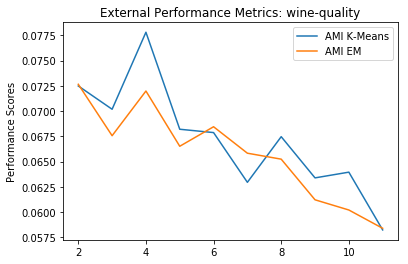

In [70]:
data = wdata

dfk = pd.read_csv(f"./results/km_{data['name']}.csv")
dfe = pd.read_csv(f"./results/em_{data['name']}.csv")
                  
fig, ax1 = plt.subplots()
                  
# ax1.plot(dfk['n_clusters'],dfk['AMI'], label="AMI")
# ax1.plot(dfk['n_clusters'],dfk['ARI'], label="ARI")
# ax1.plot(dfk['n_clusters'],dfk['v-measure'], label="v-measure")
# ax1.plot(dfk['n_clusters'],dfk['homogenity'], label="homogenity")
# ax1.plot(dfk['n_clusters'],dfk['completeness'], label="completeness")
# ax1.plot(dfk['n_clusters'],dfk['mutual_info'], label="mutual_info")
# ax1.plot(dfk['n_clusters'],dfk['NMI'], label="NMI")   
ax1.plot(dfk['n_clusters'],dfk['AMI'], label="AMI K-Means")
ax1.plot(dfe['n_clusters'],dfe['AMI'], label="AMI EM")
ax1.set_title("External Performance Metrics: %s"%data['name'])
ax1.set_ylabel('Performance Scores')
print("K Means, AMI", np.argmax(dfk['AMI']),np.max(dfk['AMI']))
print("EM, AMI", np.argmax(dfe['AMI']),np.max(dfe['AMI']))
# print("K Means, silhouette", np.argmax(dfk['silhouette']),np.max(dfk['silhouette']))
# print("EM, silhouette", np.argmax(dfe['silhouette']),np.max(dfe['silhouette']))

ax1.legend()
plt.show()

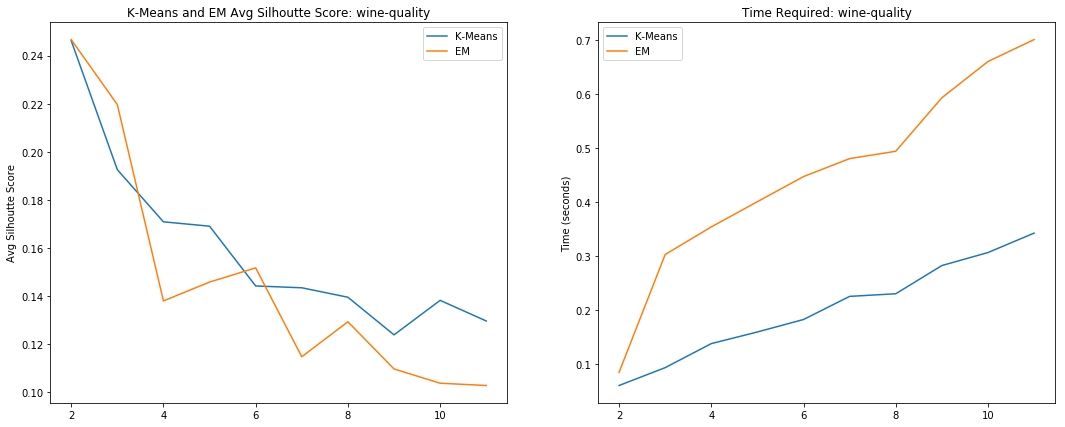

In [55]:
data = wdata

dfk = pd.read_csv(f"./results/km_{data['name']}.csv")
dfe = pd.read_csv(f"./results/em_{data['name']}.csv")
                  
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18, 7)                  
ax1.plot(dfk['n_clusters'],dfk['silhouette'], label="K-Means")
ax1.plot(dfe['n_clusters'],dfe['silhouette'], label="EM")
ax1.set_ylabel("Avg Silhoutte Score")
ax1.set_title("K-Means and EM Avg Silhoutte Score: %s"%data['name'])
ax1.legend()

ax2.plot(dfk['n_clusters'],dfk['time'], label="K-Means")
ax2.plot(dfe['n_clusters'],dfe['time'], label="EM")
ax2.set_ylabel("Time (seconds)")
ax2.set_title("Time Required: %s"%data['name'])
ax2.legend()
plt.show()


# plt.show()
                  
# plt.plot(dfk['n_clusters'],dfk['AMI'], label="AMI K Means")
# plt.plot(dfe['n_clusters'],dfe['AMI'], label="AMI EM")
# plt.plot(dfk['n_clusters'],dfk['silhouette'], label="Avg Silhoutte K Means")
# plt.plot(dfe['n_clusters'],dfe['silhouette'], label="Avg Silhoutte EM")

# print("K Means, AMI", np.argmax(dfk['AMI']),np.max(dfk['AMI']))
# print("EM, AMI", np.argmax(dfe['AMI']),np.max(dfe['AMI']))
# print("K Means, silhouette", np.argmax(dfk['silhouette']),np.max(dfk['silhouette']))
# print("EM, silhouette", np.argmax(dfe['silhouette']),np.max(dfe['silhouette']))

# plt.legend()
# plt.show()

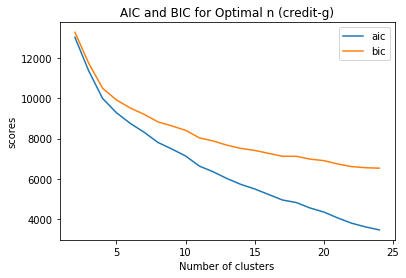

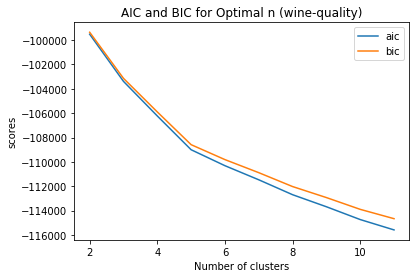

In [45]:
def aic_bic(data):
    n_clusters_range = list(range(2, data['n_features']+1))
    df = performance_em(data['X'], 
                                  data['y'], 
                                  data['name'], 
                                  n_clusters_range=n_clusters_range)

    #Plotting the results onto a line graph, allowing us to observe 'The elbow'
    plt.plot(df['n_clusters'], df['aic'])
    plt.plot(df['n_clusters'], df['bic'])
    plt.title('AIC and BIC for Optimal n (%s)'%data['name'])
    plt.xlabel('Number of clusters')
    plt.ylabel('scores') #within cluster sum of squares
    plt.legend()
    plt.show()

aic_bic(cdata)
aic_bic(wdata)